# State Transition Visualisation

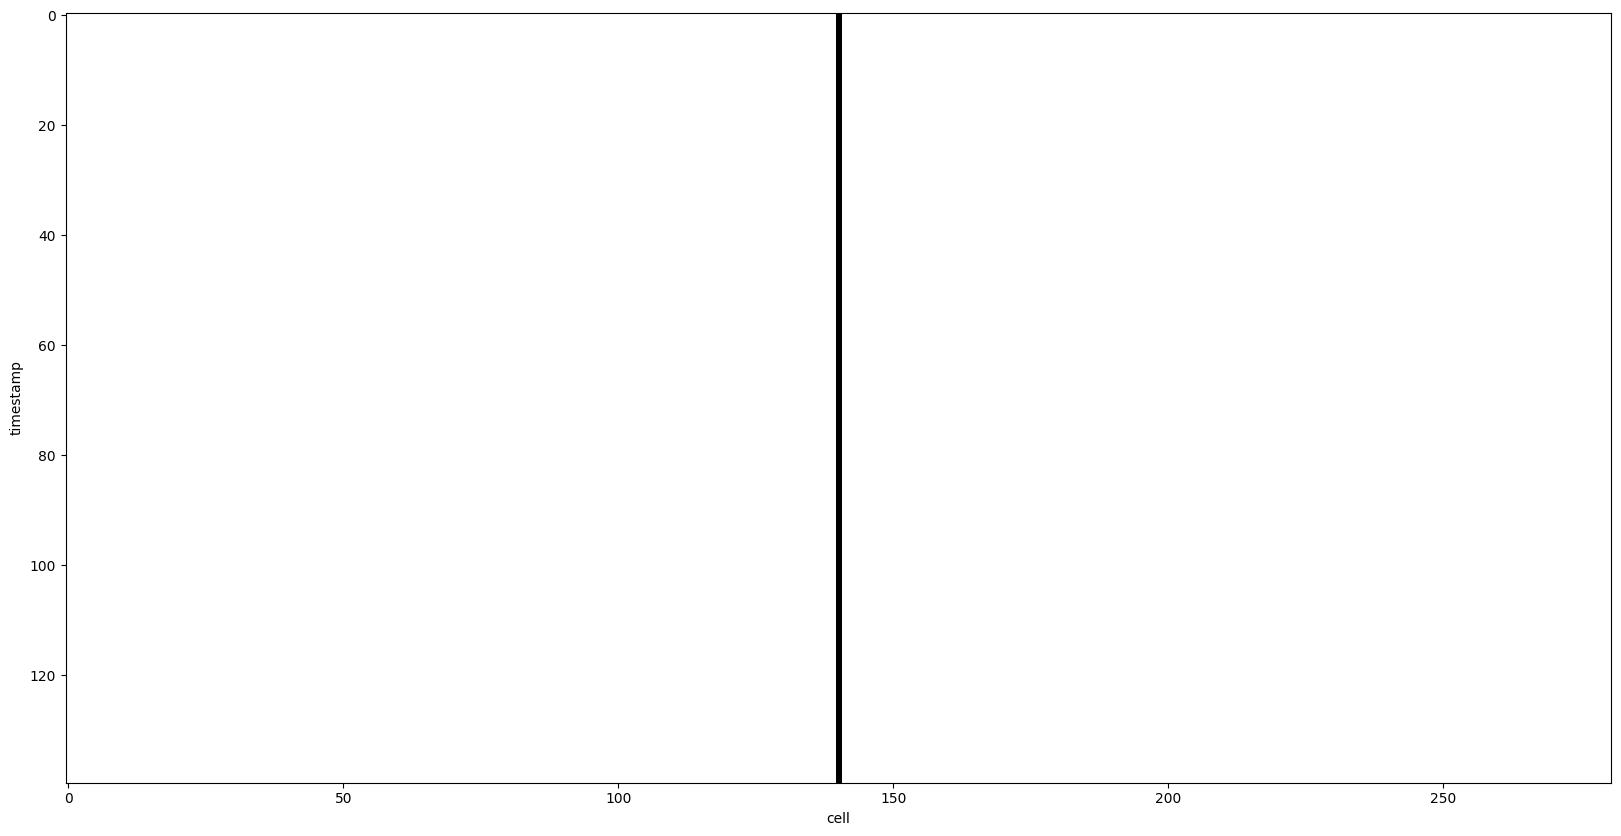

In [116]:
import random
import numpy as np
import matplotlib.pyplot as plt


# this lambda function is a helper function that convert the rule number in binary format of 8 characters
binary_r = lambda r: format(r, f'0{8}b')

def StateTGen(rule_1,time,length):
    history = []
    automata_rule_1 = {}
    
    r_1 = binary_r(rule_1)
    
    container_bin = [format(i, f'0{3}b') for i in range(2**3)][::-1]    # output:['111', '110', '101', '100', '011', '010', '001', '000']
    for i,key in enumerate(container_bin):
        automata_rule_1[key] = r_1[i]
      
    current = length*'0'+'1'+length*'0'      # expand as much as you like
    
    while time>0:
        history.append(np.array([int(i) for i in current]))
        exec = current[-1] + current + current[0]
        new = ''                                                
        for i in range(len(current)):                            
            new += automata_rule_1[exec[i:i+3]]                                               
        current = new
        time -= 1
        
    return history

time = 140
rule = 204
length = 140

# rule_1 = 30 : timestamp = 10 ; latticeLength = 5 ; 
history1 = StateTGen(rule,time,length)       # enter the details

plt.figure(figsize=(20,10))
plt.imshow((history1), cmap="binary", interpolation="nearest")


plt.xlabel("cell")
plt.ylabel("timestamp")

plt.show()


# For grid

# plt.grid(which='both', color='black', linestyle='-', linewidth=2)
# plt.xticks(np.arange(-0.5, len(history1[0]), 1), [])
# plt.yticks(np.arange(-0.5, len(history1), 1), [])
# plt.gca().set_xticks(np.arange(-0.5, len(history1[0]), 1), minor=True)
# plt.gca().set_yticks(np.arange(-0.5, len(history1), 1), minor=True)
# plt.grid(which='minor', color='black', linestyle='-', linewidth=2)

# plt.xlabel("cell")
# plt.ylabel("timestamp")
# plt.show()
        
    

# Hybrid Cellular Automaton ( Two rules )

In the following code, rule vectors are added as rule_1 and rule_2 parameter. 

Type 1  When the cells are partitioned into set randomly for each rule

Type 2  When the cells are applied by each of the two rules alternatively

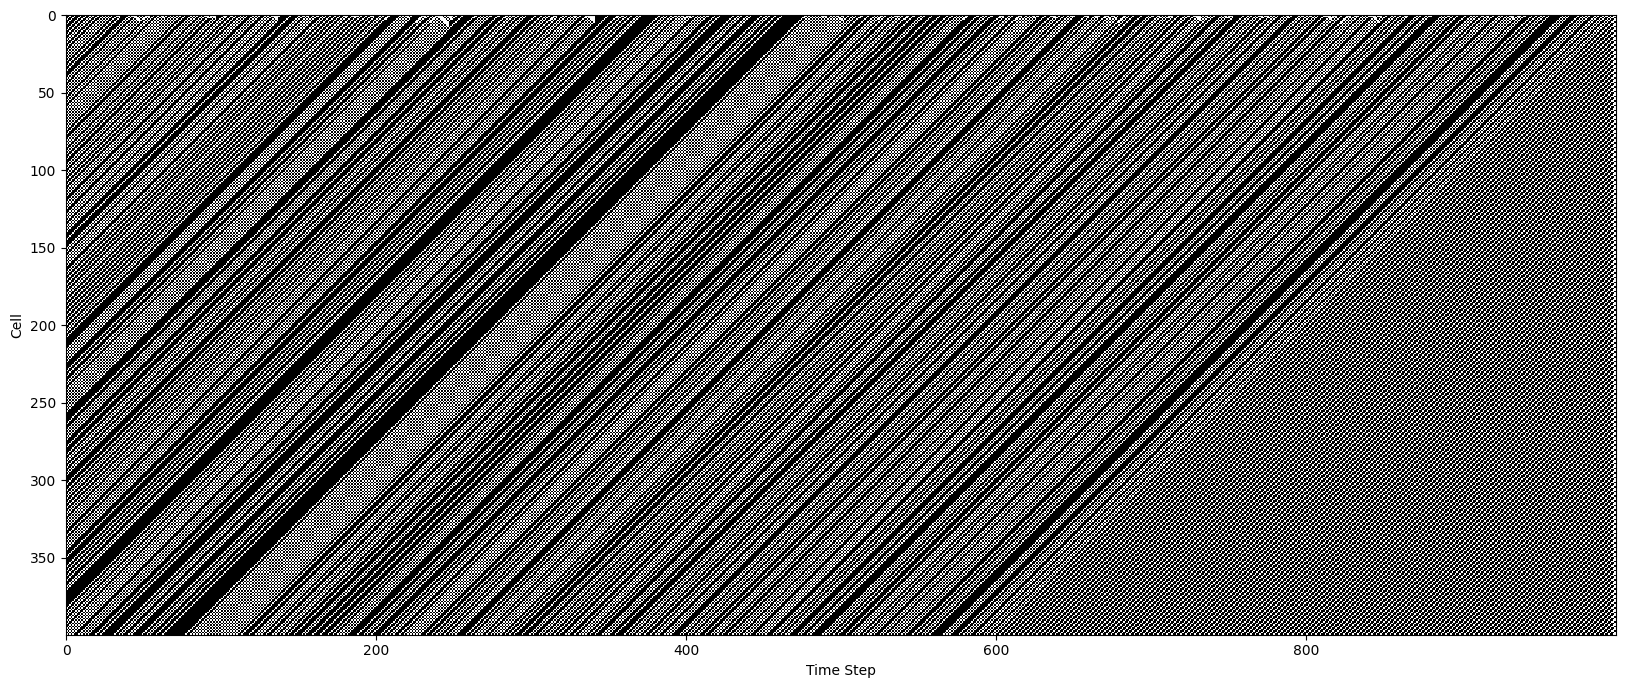

In [102]:
import random
import numpy as np
import matplotlib.pyplot as plt
#This lambda function create an arbitrary binary strings of length n

random_binary_string = lambda n: ''.join(random.choice('01') for _ in range(n)) 

# this lambda function is a helper function that convert the rule number in binary format of 8 characters
binary_r = lambda r: format(r, f'0{8}b')

def hybridCA(rule_1,rule_2,time,n_length,type):
    history = []
    automata_rule_1 = {}
    automata_rule_2 = {}
    r_1 = binary_r(rule_1)
    r_2 = binary_r(rule_2)
    container_bin = [format(i, f'0{3}b') for i in range(2**3)][::-1]    # output:['111', '110', '101', '100', '011', '010', '001', '000']
    for i,key in enumerate(container_bin):
        automata_rule_1[key] = r_1[i]
        automata_rule_2[key] = r_2[i]
    
    random_index = set(random.sample(range(0, n_length), n_length//2))   # partition the indices into types for each rule randomly
    current = random_binary_string(n_length)
   
    while time>0:
        
        exec = '0' + current + '0'
        new = ''
        if type == 1:                                                     # type 1 when the index are randomly partitioned for each rule
            for i in range(len(current)):                            
                if i in random_index:
                    new += automata_rule_1[exec[i:i+3]]                   # this piece of code ensure the hybrid nature of automaton                                
                else:                                                     # rule_1 acts on half of the index, rule_2 acts on other half
                    new += automata_rule_2[exec[i:i+3]] 
        if type == 2:                                                     # type 2 when the rules act on alternative indices
            for i in range(len(current)):                        
                if i%2:
                    new += automata_rule_1[exec[i:i+3]]    
                else:           
                    new += automata_rule_2[exec[i:i+3]] 

        current = new
        time -= 1
        history.append(np.array([int(i) for i in current]))
    return history

type = 1       # random partition of cells
# rule_1 = 30 ; rule_2 = 120 ; timestamp = 10 ; latticeLength = 5 ; 
history1 = hybridCA(184,171,400,1000,type)       # enter the details

plt.figure(figsize=(20,10))
plt.imshow((history1), cmap="binary", interpolation="nearest")

plt.xlabel("Time Step")
plt.ylabel("Cell")

plt.show()
        
    

# XORing of all state transition diagram

The diagram is the result of bitwise XORing all the state transition diagram belonging to each rule over one another. Ofcourse, the bitwise AND and OR operation results Pitch White and Pitch Black diagram respectively. 

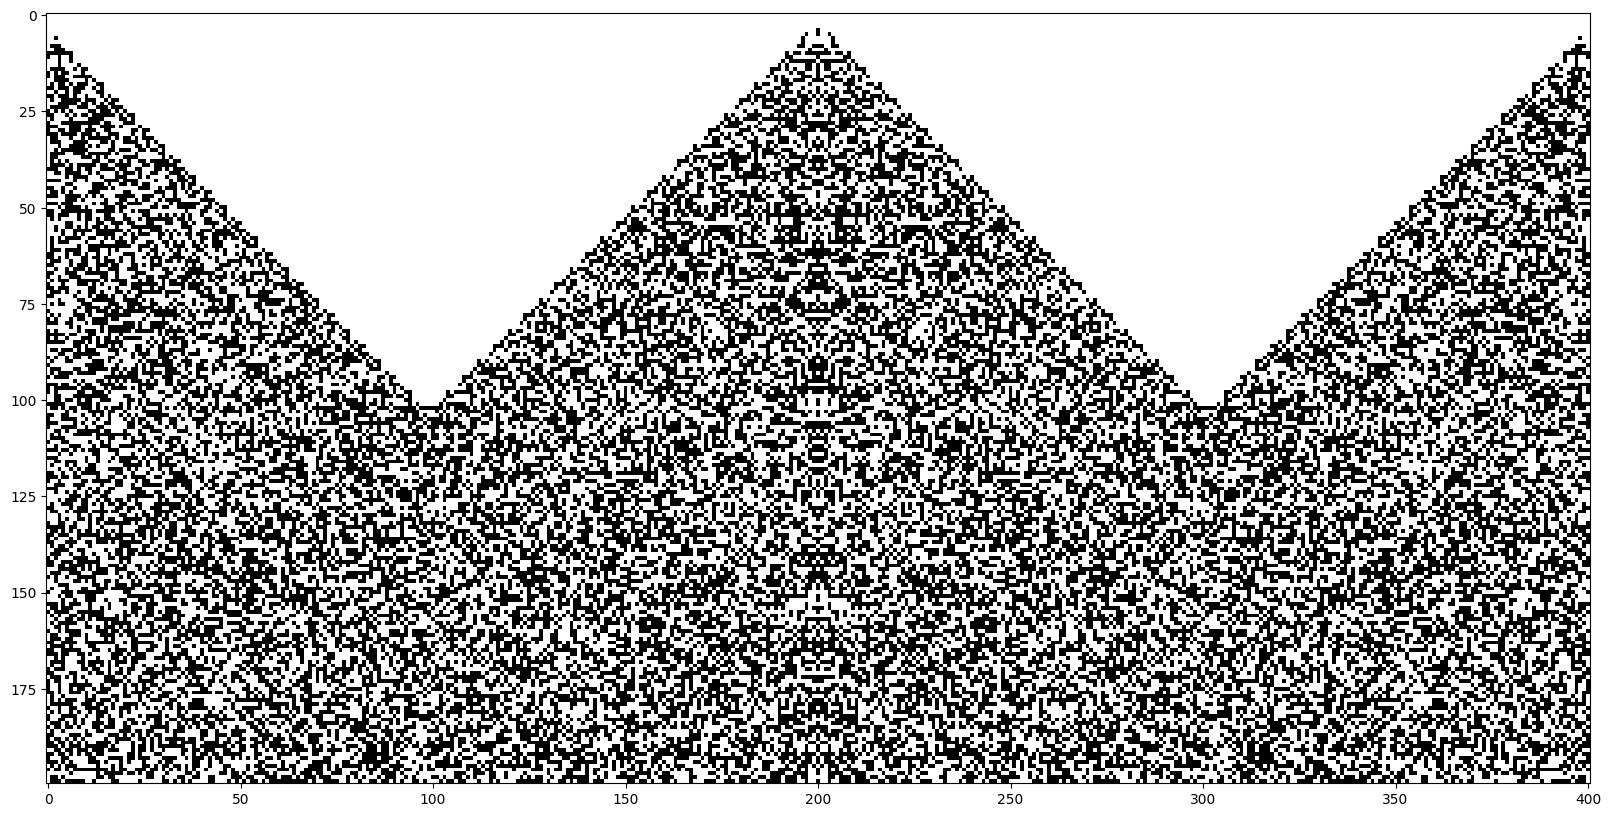

In [103]:
import random
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce


# this lambda function is a helper function that convert the rule number in binary format of 8 characters

random_binary_string = lambda n: ''.join(random.choice('01') for _ in range(n))

def StateTGen(rule_1,time,initial_st):
    history = []
    automata_rule_1 = {}
    
    r_1 = format(rule_1, f'0{8}b')
    
    container_bin = [format(i, f'0{3}b') for i in range(2**3)][::-1]    # output:['111', '110', '101', '100', '011', '010', '001', '000']
    for i,key in enumerate(container_bin):
        automata_rule_1[key] = r_1[i]
      
    current = initial_st      # expand as much as you like
    
    while time>0:
        history.append(np.array([int(i) for i in current]))
        exec = '0' + current + '0'                         # current[-1] + current + current[0]
        new = ''                                                
        for i in range(len(current)):                            
            new += automata_rule_1[exec[i:i+3]]                                               
        current = new
        time -= 1
    
    return history
leng = 200
time = 200
initial_state = leng*'0'+'1'+ leng*'0'

mother_mat = []
for i in range(256):
    mother_mat.append(StateTGen(i,time,initial_state))

XORed = reduce(np.bitwise_xor, mother_mat)

bit_array = np.array([int(i) for i in initial_state]).reshape(1, -1)  # Reshape to horizontal array

# # Plotting
# plt.figure(figsize=(10, 1))
# plt.imshow(bit_array, cmap="binary", interpolation="nearest")
# plt.axis('off')  # Turn off axis labels
# plt.show()

plt.figure(figsize=(20,10))
plt.imshow(XORed, cmap="binary", interpolation="nearest")



        
    

IN the next variation, we can take the rules of our likeness. Below is the example of a set of linear rules.

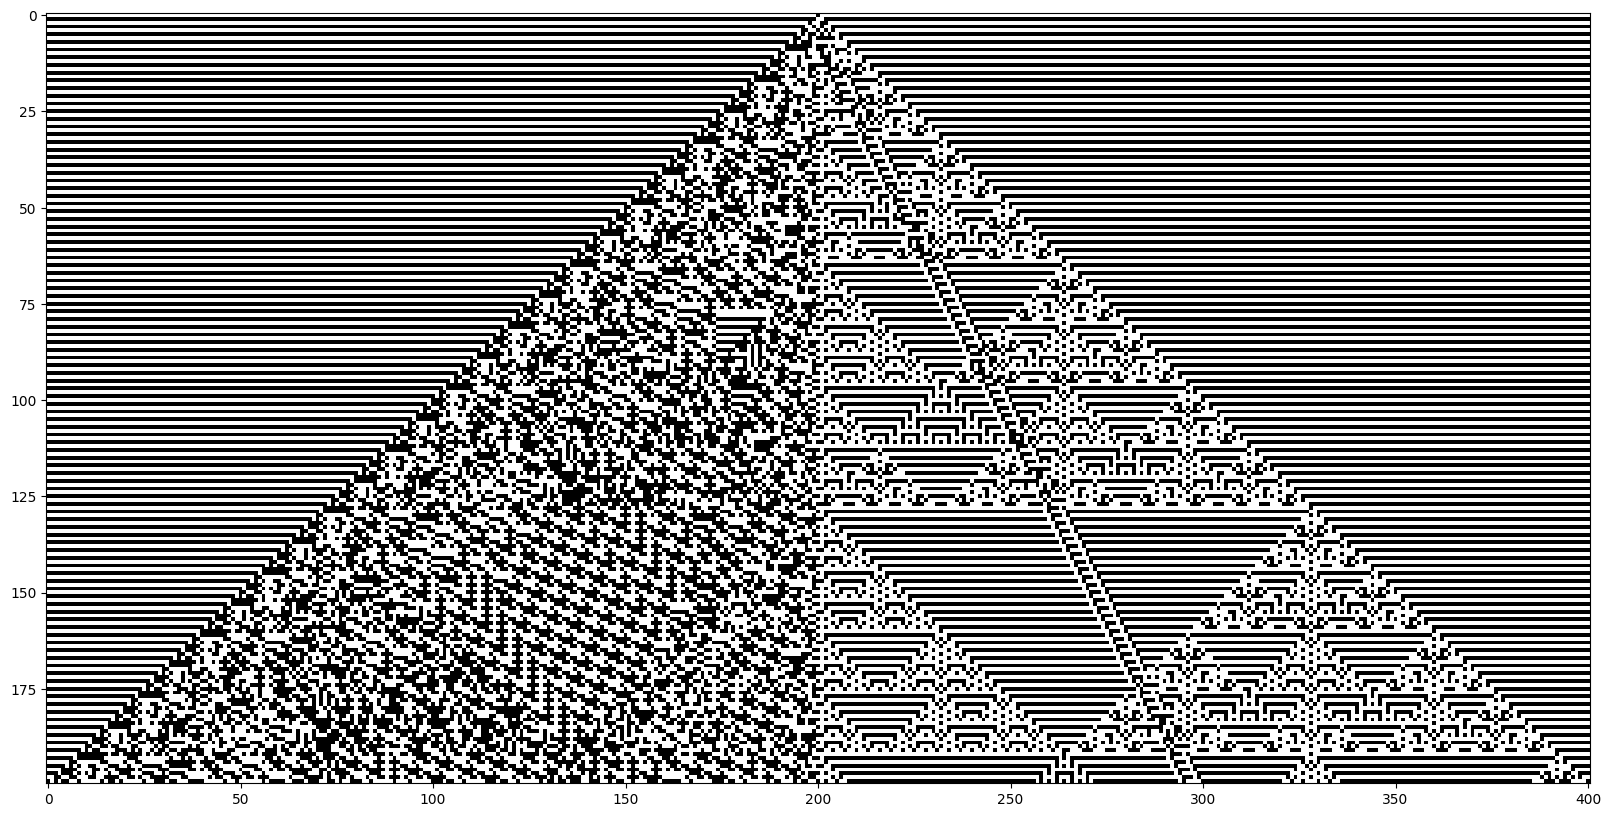

In [108]:
import random
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce


# this lambda function is a helper function that convert the rule number in binary format of 8 characters

random_binary_string = lambda n: ''.join(random.choice('01') for _ in range(n))

def StateTGen(rule_1,time,initial_st):
    history = []
    automata_rule_1 = {}
    
    r_1 = format(rule_1, f'0{8}b')
    
    container_bin = [format(i, f'0{3}b') for i in range(2**3)][::-1]    # output:['111', '110', '101', '100', '011', '010', '001', '000']
    for i,key in enumerate(container_bin):
        automata_rule_1[key] = r_1[i]
      
    current = initial_st      # expand as much as you like
    
    while time>0:
        history.append(np.array([int(i) for i in current]))
        exec = current[-1] + current + current[0]
        new = ''                                                
        for i in range(len(current)):                            
            new += automata_rule_1[exec[i:i+3]]                                               
        current = new
        time -= 1
    
    return history

leng = 200
time = 200

initial_state = leng*'0'+'1'+ leng*'0'

Rules_Bin1 = [0,60,90,150,170,102,204,240]    # set of linear rule
Rules_Bin = [150,90,184,110,25]
mother_mat = []
for i in Rules_Bin:
    mother_mat.append(StateTGen(i,time,initial_state))

XORed = reduce(np.bitwise_xor, mother_mat)

plt.figure(figsize=(20,10))
plt.imshow(XORed, cmap="binary", interpolation="nearest")

In [ ]:
rev_rules = [15,45,51,60,75,85,89,90,101,102,105,150,153,154,165,166,170,180,195,204,210,240]

# this lambda function is a helper function that convert the rule number in binary format of 8 characters

random_binary_string = lambda n: ''.join(random.choice('01') for _ in range(n))

def StateTGen(rule_1,time,initial_st):
    history = []
    automata_rule_1 = {}
    
    r_1 = format(rule_1, f'0{8}b')
    
    container_bin = [format(i, f'0{3}b') for i in range(2**3)][::-1]    # output:['111', '110', '101', '100', '011', '010', '001', '000']
    for i,key in enumerate(container_bin):
        automata_rule_1[key] = r_1[i]
      
    current = initial_st      # expand as much as you like
    
    while time>0:
        history.append(np.array([int(i) for i in current]))
        exec = current[-1] + current + current[0]
        new = ''                                                
        for i in range(len(current)):                            
            new += automata_rule_1[exec[i:i+3]]                                               
        current = new
        time -= 1
    
    return history

leng = 15
time = 30

initial_state = leng*'0'+'1'+ leng*'0'

mother_mat = []
for i in rev_rules:
    plt.figure(figsize=(10,5)) 
    plt.imshow(StateTGen(i,time,initial_state), cmap="binary", interpolation="nearest")
    plt.title(f'Rule {i}')

In [117]:
pip show cirq


Name: cirq
Version: 1.4.1
Summary: A framework for creating, editing, and invoking Noisy Intermediate Scale Quantum (NISQ) circuits.
Home-page: http://github.com/quantumlib/cirq
Author: The Cirq Developers
Author-email: cirq-dev@googlegroups.com
License: Apache 2
Location: d:\QiskitVirt\.venv\Lib\site-packages
Requires: cirq-aqt, cirq-core, cirq-google, cirq-ionq, cirq-pasqal, cirq-rigetti, cirq-web
Required-by: 
Note: you may need to restart the kernel to use updated packages.
